## Bank Personal Loan Classification

In [13]:
#Import Necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Dataset Analysis
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


In [5]:
bank_df['Personal Loan'].value_counts().rename_axis('Personal Loan').to_frame('No of customers')

,No of customers
Personal Loan,
0,4520
1,480


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

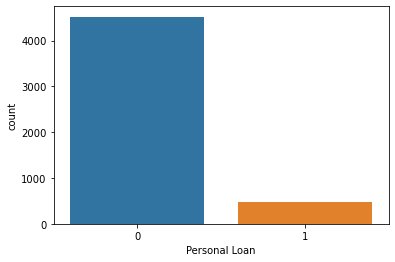

In [8]:
sns.countplot(bank_df['Personal Loan'])

<AxesSubplot:xlabel='Age', ylabel='Income'>

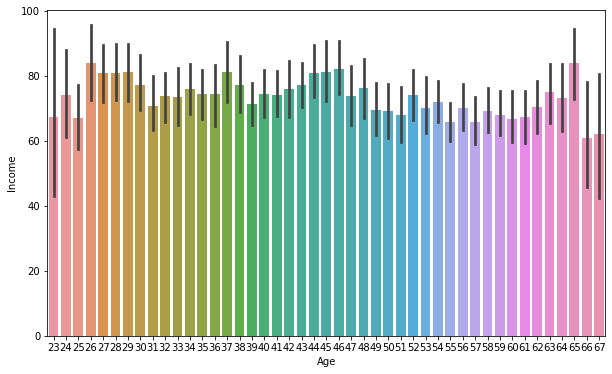

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="Age", y="Income", data=bank_df)

In [15]:
feature = bank_df.copy().drop('Personal Loan', axis=1)
target = bank_df['Personal Loan']

In [16]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=5, test_size=0.20)
# Scale data to obtain zero mean and unit variance
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [17]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


## SVM

In [18]:
# Create SVM object
svm = SVC()

In [19]:
t = time()
# Train the model
svm.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.213 s


In [20]:
# Predict train data set
pred_train = svm.predict(x_train)
# Predict test data set
pred_test = svm.predict(x_test)

In [21]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.98175
Accuracy on test is: 0.971


In [22]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.95      0.74      0.83        96

    accuracy                           0.97      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000



#### Confusion matrix for Train data

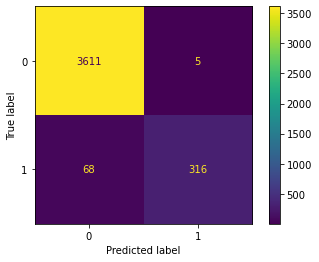

In [23]:

# Plot confusion matrix for train data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train)).plot()

#### Confusion matrix for Test data

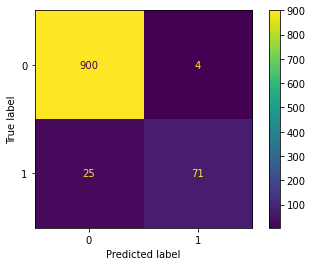

In [24]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test)).plot()

#### Performance of our model

In [25]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.95      0.74      0.83        96

    accuracy                           0.97      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000



In [26]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.8675792772861357
